![image.png](https://i.imgur.com/a3uAqnb.png)

# 📊 Simple Student Performance Analysis - KAUST Academy
---
### 🎯 **Lab Objectives:**
1. **Learn to explore real data** like a data detective 🔍
2. **Discover interesting patterns** about student performance 📈
3. **Create simple visualizations** to tell stories with data 🎨
4. **Practice basic data analysis** with real student exam data 📚

---
### 📚 **What You'll Learn:**
- **Loading Data:** Getting real data from the internet
- **Exploring Data:** Understanding what's in our dataset
- **Simple Analysis:** Finding averages and patterns
- **Basic Charts:** Making graphs to visualize data
- **Drawing Conclusions:** What the data tells us

### 🌟 **Questions We'll Answer:**
- 📖 Do boys and girls perform differently in different subjects?
- 🍽️ Does getting free lunch affect test scores?
- 📝 How much does test preparation help?

---

**🎉 Ready to become a data detective? Let's explore real student data! 🔍**

# **📌 Step 1: Getting Our Tools Ready**

First, let's import the tools we need for data analysis! 🛠️

In [ ]:
# Import the tools we need
import pandas as pd                    # 📊 For working with data tables
import matplotlib.pyplot as plt        # 📈 For making charts
import kagglehub                       # 📂 For downloading data

# Make our charts look nice
plt.style.use('seaborn-v0_8')

print("🎯 All tools ready!")
print("🚀 Let's start exploring data!")

🎯 All tools ready!
🚀 Let's start exploring data!


# **📌 Step 2: Loading Real Student Data**

Time to get our hands on real student performance data! 📚

In [ ]:
# Download student performance data from the internet
print("📥 Downloading student data...")

# Get the data
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("✅ Data downloaded!")

# Load the data into Python
import os
csv_file = os.path.join(path, "StudentsPerformance.csv")
data = pd.read_csv(csv_file)

print(f"📊 We have data for {len(data)} students!")
print("🎉 Ready to explore!")

📥 Downloading student data...
✅ Data downloaded!
📊 We have data for 1000 students!
🎉 Ready to explore!


# **📌 Step 3: First Look at Our Data**

Let's peek at our data and see what we have! 👀

In [ ]:
# Look at the first few rows of data
print("👀 First 5 students in our data:")
display(data.head())

print("\n📋 What information do we have?")
print(f"Number of students: {len(data)}")
print(f"Information about each student: {list(data.columns)}")

print("\n📊 Quick data summary:")
print(data.describe())

👀 First 5 students in our data:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score,performance_level,parent_education_simple,best_subject,well_rounded,improvement_potential
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Good,University,Writing,True,2
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Excellent,College,Reading,False,21
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Excellent,University,Reading,True,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Needs Support,College,Reading,False,13
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Good,College,Reading,True,3



📋 What information do we have?
Number of students: 1000
Information about each student: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'total_score', 'average_score', 'performance_level', 'parent_education_simple', 'best_subject', 'well_rounded', 'improvement_potential']

📊 Quick data summary:
       math score  reading score  writing score  total_score  average_score  \
count  1000.00000    1000.000000    1000.000000  1000.000000    1000.000000   
mean     66.08900      69.169000      68.054000   203.312000      67.770667   
std      15.16308      14.600192      15.195657    42.771978      14.257326   
min       0.00000      17.000000      10.000000    27.000000       9.000000   
25%      57.00000      59.000000      57.750000   175.000000      58.333333   
50%      66.00000      70.000000      69.000000   205.000000      68.333333   
75%      77.00000      79.000000      79.000000   233.

# **📌 Step 4: Cleaning Our Data**

Before we analyze, we need to clean our data like a detective checking evidence! 🔍🧹

## **🔹 Checking for Problems**

In [ ]:
print("🔍 DATA DETECTIVE MODE: Checking for problems!")
print("=" * 45)

# Check 1: Are there any missing values?
print("\n❓ Checking for missing information:")
missing_values = data.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ Great! No missing data found!")
else:
    print("⚠️ Found some missing data that needs fixing.")

# Check 2: Are there any duplicate students?
print("\n🔄 Checking for duplicate students:")
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates == 0:
    print("✅ No duplicate students found!")
else:
    print(f"⚠️ Found {duplicates} duplicate students.")

# Check 3: Do the scores make sense?
print("\n📊 Checking if scores are reasonable (0-100):")
score_columns = ['math score', 'reading score', 'writing score']

for subject in score_columns:
    min_score = data[subject].min()
    max_score = data[subject].max()
    print(f"{subject}: {min_score} to {max_score}")

    if min_score < 0 or max_score > 100:
        print(f"⚠️ {subject} has unusual scores!")
    else:
        print(f"✅ {subject} scores look good!")

print("\n🎉 Data quality check complete!")

🔍 DATA DETECTIVE MODE: Checking for problems!

❓ Checking for missing information:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
✅ Great! No missing data found!

🔄 Checking for duplicate students:
Number of duplicate rows: 0
✅ No duplicate students found!

📊 Checking if scores are reasonable (0-100):
math score: 0 to 100
✅ math score scores look good!
reading score: 17 to 100
✅ reading score scores look good!
writing score: 10 to 100
✅ writing score scores look good!

🎉 Data quality check complete!


## **🔹 Simple Data Preprocessing**
Let's prepare our data for analysis by creating some useful new information! 🛠️

In [ ]:
print("🛠️ DATA PREPROCESSING: Making our data better!")
print("=" * 45)

# Step 1: Create a total score for each student
print("\n1️⃣ Creating total scores...")
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
print(f"✅ Total score created! Range: {data['total_score'].min()} to {data['total_score'].max()}")

# Step 2: Create an average score
print("\n2️⃣ Creating average scores...")
data['average_score'] = data['total_score'] / 3
print(f"✅ Average score created! Overall average: {data['average_score'].mean():.1f}")

# Step 3: Create performance categories
print("\n3️⃣ Creating performance categories...")
def get_performance_level(avg_score):
    if avg_score >= 80:
        return 'Excellent'
    elif avg_score >= 70:
        return 'Good'
    elif avg_score >= 60:
        return 'Average'
    else:
        return 'Needs Support'

data['performance_level'] = data['average_score'].apply(get_performance_level)
print("✅ Performance levels created!")
print("Distribution:")
print(data['performance_level'].value_counts())

# Step 4: Simplify parent education categories
print("\n4️⃣ Simplifying parent education levels...")
print("Original categories:", data['parental level of education'].unique())

# Create simpler categories
def simplify_education(education):
    if 'high school' in education:
        return 'High School'
    elif 'college' in education or "associate's" in education:
        return 'College'
    elif "bachelor's" in education or "master's" in education:
        return 'University'
    else:
        return 'Other'

data['parent_education_simple'] = data['parental level of education'].apply(simplify_education)
print("✅ Simplified education categories!")
print("New categories:")
print(data['parent_education_simple'].value_counts())

print("\n🎉 Data preprocessing complete! Our data is ready for analysis!")

🛠️ DATA PREPROCESSING: Making our data better!

1️⃣ Creating total scores...
✅ Total score created! Range: 27 to 300

2️⃣ Creating average scores...
✅ Average score created! Overall average: 67.8

3️⃣ Creating performance categories...
✅ Performance levels created!
Distribution:
performance_level
Needs Support    285
Good             261
Average          256
Excellent        198
Name: count, dtype: int64

4️⃣ Simplifying parent education levels...
Original categories: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
✅ Simplified education categories!
New categories:
parent_education_simple
College        448
High School    375
University     177
Name: count, dtype: int64

🎉 Data preprocessing complete! Our data is ready for analysis!


## **🎯 Data Cleaning Practice!**
**Exercise:** Practice your data cleaning skills!

In [ ]:
# TODO: Practice cleaning and preprocessing data!
print("🎯 DATA CLEANING PRACTICE:")
print("=" * 30)

# Challenge 1: Create a 'best_subject' column
print("\n📚 Challenge 1: Find each student's best subject")

def find_best_subject(row):
    # TODO: Complete this function
    math = row['math score']
    reading = row['reading score']
    writing = row['writing score']

    # Find which score is highest
    if math >= reading and math >= writing:
        return 'Math'
    elif reading >= math and reading >= writing:
        return 'Reading'
    else:
        return 'Writing'

data['best_subject'] = data.apply(find_best_subject, axis=1)
print("✅ Best subject found for each student!")
print("Distribution of best subjects:")
print(data['best_subject'].value_counts())

# Challenge 2: TODO - Create a 'well_rounded' column
print("\n⚖️ Challenge 2: Find well-rounded students")
print("(Students whose scores are all within 10 points of each other)")

# TODO: Complete this code
def is_well_rounded(row):
    scores = [row['math score'], row['reading score'], row['writing score']]
    highest = max(scores)
    lowest = min(scores)
    difference = highest - lowest

    # TODO: Return True if difference is 10 or less, False otherwise
    return difference <= 10

data['well_rounded'] = data.apply(is_well_rounded, axis=1)
well_rounded_count = data['well_rounded'].sum()
print(f"✅ Found {well_rounded_count} well-rounded students ({well_rounded_count/len(data)*100:.1f}%)")

# Challenge 3: TODO - Create score improvement potential
print("\n🚀 Challenge 3: Calculate improvement potential")
print("(How much each student could potentially improve)")

# TODO: For each student, find the difference between their best and worst subject
def improvement_potential(row):
    scores = [row['math score'], row['reading score'], row['writing score']]
    return max(scores) - min(scores)

data['improvement_potential'] = data.apply(improvement_potential, axis=1)
avg_improvement = data['improvement_potential'].mean()
print(f"✅ Average improvement potential: {avg_improvement:.1f} points")

# Show students with highest improvement potential
high_potential = data[data['improvement_potential'] > 20]
print(f"Students with >20 points improvement potential: {len(high_potential)}")

print("\n🎉 Great job with data cleaning practice!")

🎯 DATA CLEANING PRACTICE:

📚 Challenge 1: Find each student's best subject
✅ Best subject found for each student!
Distribution of best subjects:
best_subject
Reading    400
Math       354
Writing    246
Name: count, dtype: int64

⚖️ Challenge 2: Find well-rounded students
(Students whose scores are all within 10 points of each other)
✅ Found 596 well-rounded students (59.6%)

🚀 Challenge 3: Calculate improvement potential
(How much each student could potentially improve)
✅ Average improvement potential: 9.8 points
Students with >20 points improvement potential: 32

🎉 Great job with data cleaning practice!


# **📌 Step 5: Understanding Our Clean Data**

Now let's explore our clean and organized data! 🔍

In [ ]:
# Look at different categories of students
print("👫 How many boys and girls?")
print(data['gender'].value_counts())

print("\n🍽️ Lunch types:")
print(data['lunch'].value_counts())

print("\n📝 Test preparation:")
print(data['test preparation course'].value_counts())

print("\n🎓 Parent education (simplified):")
print(data['parent_education_simple'].value_counts())

print("\n🏆 Performance levels:")
print(data['performance_level'].value_counts())

print("\n📚 Best subjects:")
print(data['best_subject'].value_counts())

👫 How many boys and girls?
gender
female    518
male      482
Name: count, dtype: int64

🍽️ Lunch types:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

📝 Test preparation:
test preparation course
none         642
completed    358
Name: count, dtype: int64

🎓 Parent education (simplified):
parent_education_simple
College        448
High School    375
University     177
Name: count, dtype: int64

🏆 Performance levels:
performance_level
Needs Support    285
Good             261
Average          256
Excellent        198
Name: count, dtype: int64

📚 Best subjects:
best_subject
Reading    400
Math       354
Writing    246
Name: count, dtype: int64


# **📌 Step 6: Basic Data Analysis**

Now let's analyze our clean data and find patterns! 📈

In [ ]:
# Calculate average scores for each subject (using our clean data)
print("📊 Average Scores by Subject:")
math_avg = data['math score'].mean()
reading_avg = data['reading score'].mean()
writing_avg = data['writing score'].mean()

print(f"🧮 Math: {math_avg:.1f}")
print(f"📖 Reading: {reading_avg:.1f}")
print(f"✍️ Writing: {writing_avg:.1f}")

# Find the best and worst performing subjects
if math_avg > reading_avg and math_avg > writing_avg:
    print("\n🏆 Math is the strongest subject!")
elif reading_avg > math_avg and reading_avg > writing_avg:
    print("\n🏆 Reading is the strongest subject!")
else:
    print("\n🏆 Writing is the strongest subject!")

# Show our preprocessed data insights
print(f"\n📈 Average total score: {data['total_score'].mean():.1f} out of 300")
print(f"📊 Average score per subject: {data['average_score'].mean():.1f} out of 100")

print(f"\n🌟 Performance Distribution:")
perf_counts = data['performance_level'].value_counts()
for level, count in perf_counts.items():
    percentage = count / len(data) * 100
    print(f"{level}: {count} students ({percentage:.1f}%)")

print(f"\n📚 Most popular subject strength: {data['best_subject'].value_counts().index[0]}")

📊 Average Scores by Subject:
🧮 Math: 66.1
📖 Reading: 69.2
✍️ Writing: 68.1

🏆 Reading is the strongest subject!

📈 Average total score: 203.3 out of 300
📊 Average score per subject: 67.8 out of 100

🌟 Performance Distribution:
Needs Support: 285 students (28.5%)
Good: 261 students (26.1%)
Average: 256 students (25.6%)
Excellent: 198 students (19.8%)

📚 Most popular subject strength: Reading


# **📌 Step 7: Comparing Groups**

Let's see if different groups of students perform differently! ⚖️

In [ ]:
# Compare boys and girls
print("👫 Boys vs Girls Performance:")
boys_avg = data[data['gender'] == 'male']['total_score'].mean()
girls_avg = data[data['gender'] == 'female']['total_score'].mean()

print(f"👦 Boys average: {boys_avg:.1f}")
print(f"👧 Girls average: {girls_avg:.1f}")

if boys_avg > girls_avg:
    print(f"Boys score {boys_avg - girls_avg:.1f} points higher on average")
else:
    print(f"Girls score {girls_avg - boys_avg:.1f} points higher on average")

# Compare lunch types
print("\n🍽️ Lunch Type Comparison:")
standard_lunch = data[data['lunch'] == 'standard']['total_score'].mean()
free_lunch = data[data['lunch'] == 'free/reduced']['total_score'].mean()

print(f"Standard lunch students: {standard_lunch:.1f}")
print(f"Free/reduced lunch students: {free_lunch:.1f}")
print(f"Difference: {standard_lunch - free_lunch:.1f} points")

# Compare test preparation
print("\n📝 Test Preparation Impact:")
with_prep = data[data['test preparation course'] == 'completed']['total_score'].mean()
no_prep = data[data['test preparation course'] == 'none']['total_score'].mean()

print(f"With test prep: {with_prep:.1f}")
print(f"Without test prep: {no_prep:.1f}")
print(f"Test prep helps by: {with_prep - no_prep:.1f} points! 🚀")

👫 Boys vs Girls Performance:
👦 Boys average: 197.5
👧 Girls average: 208.7
Girls score 11.2 points higher on average

🍽️ Lunch Type Comparison:
Standard lunch students: 212.5
Free/reduced lunch students: 186.6
Difference: 25.9 points

📝 Test Preparation Impact:
With test prep: 218.0
Without test prep: 195.1
Test prep helps by: 22.9 points! 🚀


# **📌 Step 8: Creating Simple Charts**

Pictures tell better stories than numbers! Let's make some charts! 📊

/tmp/ipython-input-10-2713753097.py:48: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2713753097.py:48: UserWarning: Glyph 128107 (\N{MAN AND WOMAN HOLDING HANDS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2713753097.py:48: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2713753097.py:48: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2713753097.py:48: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2713753097.py:48: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) mis

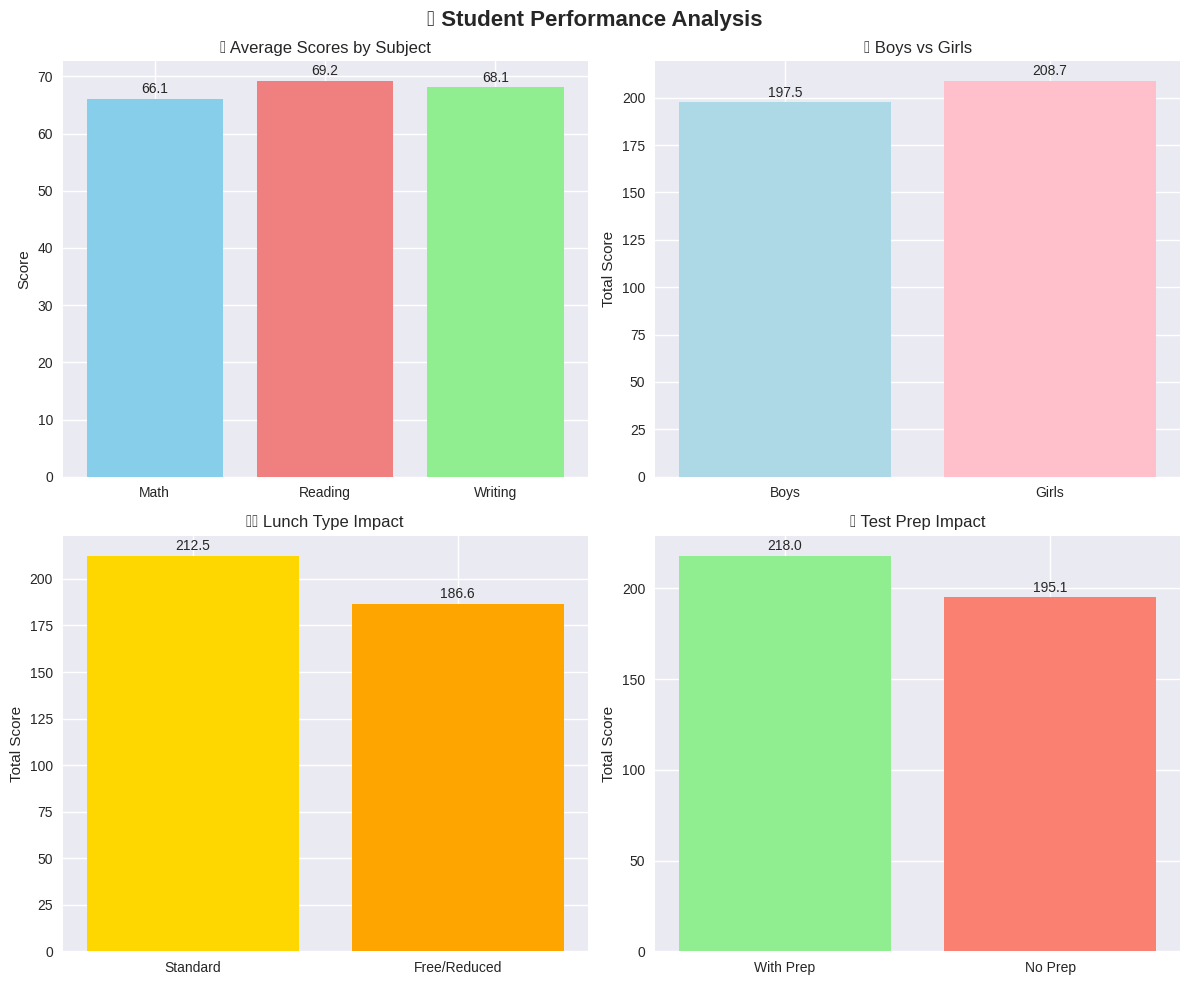

🎨 Charts complete! What patterns do you see?


In [ ]:
# Create simple bar charts
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('🎓 Student Performance Analysis', fontsize=16, fontweight='bold')

# 1. Subject scores comparison
subjects = ['Math', 'Reading', 'Writing']
scores = [math_avg, reading_avg, writing_avg]
colors = ['skyblue', 'lightcoral', 'lightgreen']

axes[0, 0].bar(subjects, scores, color=colors)
axes[0, 0].set_title('📚 Average Scores by Subject')
axes[0, 0].set_ylabel('Score')

# Add score labels on bars
for i, score in enumerate(scores):
    axes[0, 0].text(i, score + 1, f'{score:.1f}', ha='center')

# 2. Gender comparison
genders = ['Boys', 'Girls']
gender_scores = [boys_avg, girls_avg]
axes[0, 1].bar(genders, gender_scores, color=['lightblue', 'pink'])
axes[0, 1].set_title('👫 Boys vs Girls')
axes[0, 1].set_ylabel('Total Score')

for i, score in enumerate(gender_scores):
    axes[0, 1].text(i, score + 3, f'{score:.1f}', ha='center')

# 3. Lunch type comparison
lunch_types = ['Standard', 'Free/Reduced']
lunch_scores = [standard_lunch, free_lunch]
axes[1, 0].bar(lunch_types, lunch_scores, color=['gold', 'orange'])
axes[1, 0].set_title('🍽️ Lunch Type Impact')
axes[1, 0].set_ylabel('Total Score')

for i, score in enumerate(lunch_scores):
    axes[1, 0].text(i, score + 3, f'{score:.1f}', ha='center')

# 4. Test preparation impact
prep_types = ['With Prep', 'No Prep']
prep_scores = [with_prep, no_prep]
axes[1, 1].bar(prep_types, prep_scores, color=['lightgreen', 'salmon'])
axes[1, 1].set_title('📝 Test Prep Impact')
axes[1, 1].set_ylabel('Total Score')

for i, score in enumerate(prep_scores):
    axes[1, 1].text(i, score + 3, f'{score:.1f}', ha='center')

plt.tight_layout()
plt.show()

print("🎨 Charts complete! What patterns do you see?")

# **📌 Step 9: What Did We Learn?**

Let's summarize our discoveries! 💡

In [ ]:
print("🔍 KEY DISCOVERIES:")
print("=" * 30)

print(f"\n📊 We analyzed {len(data)} students")

# Subject findings
strongest_subject = ['Math', 'Reading', 'Writing'][scores.index(max(scores))]
print(f"\n📚 {strongest_subject} is the strongest subject ({max(scores):.1f} average)")

# Gender findings
if girls_avg > boys_avg:
    print(f"👧 Girls perform better overall (+{girls_avg - boys_avg:.1f} points)")
else:
    print(f"👦 Boys perform better overall (+{boys_avg - girls_avg:.1f} points)")

# Socioeconomic findings
lunch_gap = standard_lunch - free_lunch
print(f"🍽️ Students with standard lunch score {lunch_gap:.1f} points higher")

# Test prep findings
prep_benefit = with_prep - no_prep
print(f"📝 Test preparation improves scores by {prep_benefit:.1f} points!")

print(f"\n🎯 BIGGEST FINDING:")
if prep_benefit > lunch_gap:
    print(f"Test preparation has the biggest impact on student success! 🚀")
else:
    print(f"Socioeconomic factors have the biggest impact on student success 📊")

print("\n✨ This shows how data can help us understand education better!")

🔍 KEY DISCOVERIES:

📊 We analyzed 1000 students

📚 Reading is the strongest subject (69.2 average)
👧 Girls perform better overall (+11.2 points)
🍽️ Students with standard lunch score 25.9 points higher
📝 Test preparation improves scores by 22.9 points!

🎯 BIGGEST FINDING:
Socioeconomic factors have the biggest impact on student success 📊

✨ This shows how data can help us understand education better!


# **🎯 YOUR TURN: Data Analysis Challenge!**

Now it's time for you to practice! Complete the exercises below! 💪

## **📝 Exercise: Analyze Parent Education Impact**

In [ ]:
# TODO: Complete this analysis about parent education
print("🎓 PARENT EDUCATION ANALYSIS - YOUR TASK:")
print("=" * 45)

# Step 1: Find students with different parent education levels
print("\n📋 Step 1: Understanding parent education levels")
print("Available education levels:")
print(data['parental level of education'].unique())

# Step 2: TODO - Calculate average scores for different education levels
print("\n📊 Step 2: Calculate averages (YOUR CODE):")

# TODO: Find average total score for students whose parents have "master's degree"
masters_avg = data[data['parental level of education'] == "master's degree"]['total_score'].mean()
print(f"Master's degree parents: {masters_avg:.1f}")

# TODO: Find average total score for students whose parents have "high school"
high_school_avg = # Your code here - copy the pattern above but change "master's degree" to "high school"
print(f"High school parents: {high_school_avg:.1f}")

# TODO: Calculate the difference
education_gap = # Your code here - subtract high_school_avg from masters_avg
print(f"\n🔍 Education gap: {education_gap:.1f} points")

# Step 3: TODO - Create a simple chart
print("\n📈 Step 3: Make a chart (YOUR CODE):")

# TODO: Create lists for the chart
education_levels = ['High School Parents', 'Masters Degree Parents']
education_scores = [high_school_avg, masters_avg]  # Use your variables

# TODO: Make the chart
plt.figure(figsize=(8, 6))
plt.bar(education_levels, education_scores, color=['lightcoral', 'lightblue'])
plt.title('🎓 Impact of Parent Education on Student Scores')
plt.ylabel('Average Total Score')

# TODO: Add score labels on bars
for i, score in enumerate(education_scores):
    plt.text(i, score + 5, f'{score:.1f}', ha='center', fontweight='bold')

plt.show()

# Step 4: TODO - Draw conclusions
print("\n💡 Step 4: Your conclusions:")
if education_gap > 10:
    print("🔍 Parent education has a BIG impact on student performance!")
elif education_gap > 5:
    print("🔍 Parent education has a moderate impact on student performance.")
else:
    print("🔍 Parent education has a small impact on student performance.")

print(f"\n🎯 BONUS QUESTION: Which has bigger impact - test prep (+{prep_benefit:.1f}) or parent education (+{education_gap:.1f})?")
# TODO: Write your answer as a comment here
# Answer:

SyntaxError: invalid syntax (ipython-input-12-838183873.py, line 18)

## **🌟 Bonus Challenge: Find Your Own Pattern!**

In [ ]:
# TODO: BONUS CHALLENGE - Explore something interesting!
print("🚀 BONUS: Find Your Own Pattern!")
print("=" * 35)

print("Ideas to explore:")
print("• Do boys and girls have different strengths in different subjects?")
print("• Which race/ethnicity group performs best in math?")
print("• Is there a relationship between writing and reading scores?")

print("\n🔍 YOUR INVESTIGATION:")
# TODO: Pick one idea above (or create your own) and investigate it!
# Use the patterns you learned:
# 1. Filter the data: data[data['column'] == 'value']
# 2. Calculate averages: .mean()
# 3. Make comparisons
# 4. Create a simple chart
# 5. Draw conclusions

# Example: Boys vs Girls in Math
print("\n📊 Example - Boys vs Girls in Math:")
boys_math = data[data['gender'] == 'male']['math score'].mean()
girls_math = data[data['gender'] == 'female']['math score'].mean()

print(f"👦 Boys math average: {boys_math:.1f}")
print(f"👧 Girls math average: {girls_math:.1f}")

if boys_math > girls_math:
    print(f"Boys are {boys_math - girls_math:.1f} points stronger in math!")
else:
    print(f"Girls are {girls_math - boys_math:.1f} points stronger in math!")

# YOUR TURN: Try analyzing reading or writing scores by gender!
# Or explore race/ethnicity differences!
# Or look at the relationship between subjects!

print("\n🎉 Great job exploring the data like a real data scientist!")

# **🎉 Congratulations!**

You've completed your first **Data Analysis Adventure**! 🎓

## **🏆 What You Accomplished:**
- ✅ **Loaded real data** from the internet
- ✅ **Explored student performance** data
- ✅ **Calculated averages** and found patterns
- ✅ **Compared different groups** of students
- ✅ **Created charts** to visualize findings
- ✅ **Drew conclusions** from data
- ✅ **Completed your own analysis** exercises!

## **🔍 Key Discoveries:**
- 📝 **Test preparation** makes a real difference!
- 🎓 **Parent education** affects student success
- 👫 **Boys and girls** may have different strengths
- 🍽️ **Socioeconomic factors** play a role in achievement

## **🚀 What's Next?**
- Learn more advanced data analysis techniques
- Work with bigger and more complex datasets
- Create interactive dashboards
- Use machine learning to make predictions

## **💡 Real-World Applications:**
The skills you learned can help analyze:
- 🏥 **Healthcare data** to improve patient care
- 🌍 **Environmental data** to fight climate change
- 💼 **Business data** to make smart decisions
- 🎮 **Gaming data** to create better experiences

---

**"Data is everywhere - now you know how to make sense of it!"**

**You're officially a Data Detective! 🕵️‍♂️📊**

---

### 🧠 **Created for KAUST Academy**
### 👨‍🏫 **Introduction to AI Program**
### 📊 **Simple Data Analysis Workshop**

**Keep exploring, keep discovering! 🔍💙**